# Problem 2
## Part A

Importing required libraries

In [2]:
import matplotlib
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.misc

For this part of problem, I will be making a function which extracts singular values of a mtrix for it's decomposition. 

I made 2 functions. 
1. Returns singular values with **fileaddress** as input
2. Gives singular values with **matrix** as input

We will see how we end up using both of these functions. 

In [3]:
def my_singular_values(filename):
    img = Image.open(filename).convert('L')
    data_image = img.getdata()
    m, n = data_image.size
    
    matrix1 = np.array(data_image).reshape(n, m)
    
    matrix1_T = np.matrix.transpose(matrix1)
    AT_A = np.matmul(matrix1_T, matrix1)

    eig_val_v, eig_vec_v = np.linalg.eig(AT_A)

    singular_values = np.sqrt(eig_val_v)    
    return singular_values

def my_singular_values2(matrix):
    matrix1_T = np.matrix.transpose(matrix)
    AT_A = np.matmul(matrix1_T, matrix)

    eig_val_v, eig_vec_v = np.linalg.eig(AT_A)

    singular_values = np.sqrt(eig_val_v)    
    return singular_values 

I have saved image files in my computer for different groups. One of my groups has different pictures of ***Avicii*** and other group has different images of *** funny animals***. After finding singular values of all 30 image matrices and plotting wrt. order of singular values. 

In [16]:
import warnings
warnings.filterwarnings('ignore')

#making a list of singular values for group 1
os.chdir("/Users/groverprince/Documents/msan/labs/msan502_david_algebra/hw5/random")
photos_group1 = []
for file in glob.glob("random*.jpg"):
    photos_group1.append(file) 
    
singular_group1 = []
for i in range(10):
    filename_call = photos_group1[i]
    singular_values = my_singular_values(filename_call)
    singular_group1.append(singular_values/np.linalg.norm(singular_values))  

"""
making a list of singular values for group 2
"""
os.chdir("/Users/groverprince/Documents/msan/labs/msan502_david_algebra/hw5/avicii")
photos_group2 = []
for file in glob.glob("avicii*.jpg"):
    photos_group2.append(file) 
    
singular_group2 = []
for i in range(10):
    filename_call2 = photos_group2[i]
    singular_values = my_singular_values(filename_call2)
    singular_group2.append(singular_values/np.linalg.norm(singular_values))    


"""
making a list of singular values for group 3
"""

singular_group3 = []
for l in range(10):
    random_computed_array = np.random.randint(0, 255, 500*500)
    random_computed_matrix = np.array(random_computed_array).reshape(500, 500)
    
    singular_values = my_singular_values2(random_computed_matrix)
    singular_group3.append(singular_values/np.linalg.norm(singular_values)) 

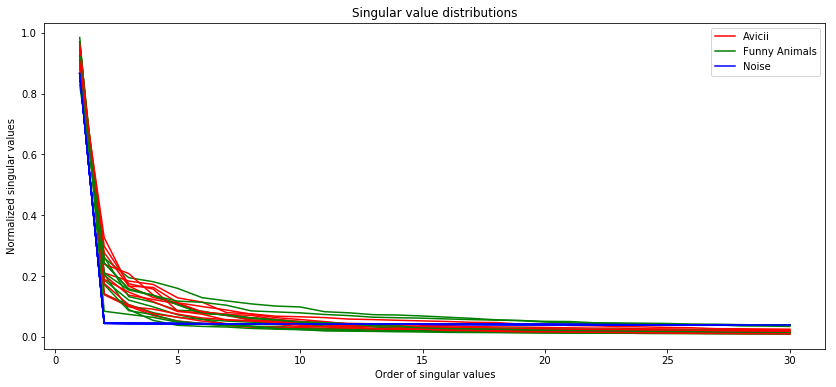

In [66]:
m = 30
n_plots = 10

plt.figure(figsize = (14,6))
plt.plot(np.arange(m)+1, singular_group1[0][:m], c = "r", label = "Avicii") 
plt.plot(np.arange(m)+1, singular_group2[0][:m], c = "g", label = "Funny Animals") 
plt.plot(np.arange(m)+1, singular_group3[0][:m], c = "b", label = "Noise")

for j in range(n_plots-1):
    plt.plot(np.arange(m)+1, singular_group1[j+1][:m], c = "r") 
    plt.plot(np.arange(m)+1, singular_group2[j+1][:m], c = "g") 
    plt.plot(np.arange(m)+1, singular_group3[j+1][:m], c = "b")
plt.title("Singular value distributions")
plt.xlabel("Order of singular values")
plt.ylabel("Normalized singular values")
plt.legend()
plt.show()  

* **Discussion** It can be seen from the above plot, singular values of **noise matrix**, drop very quickly, much faster than original images. What is means is that, we need less number of singular values to recreate random image as compared to human/animal/landscape image. 

## Part B

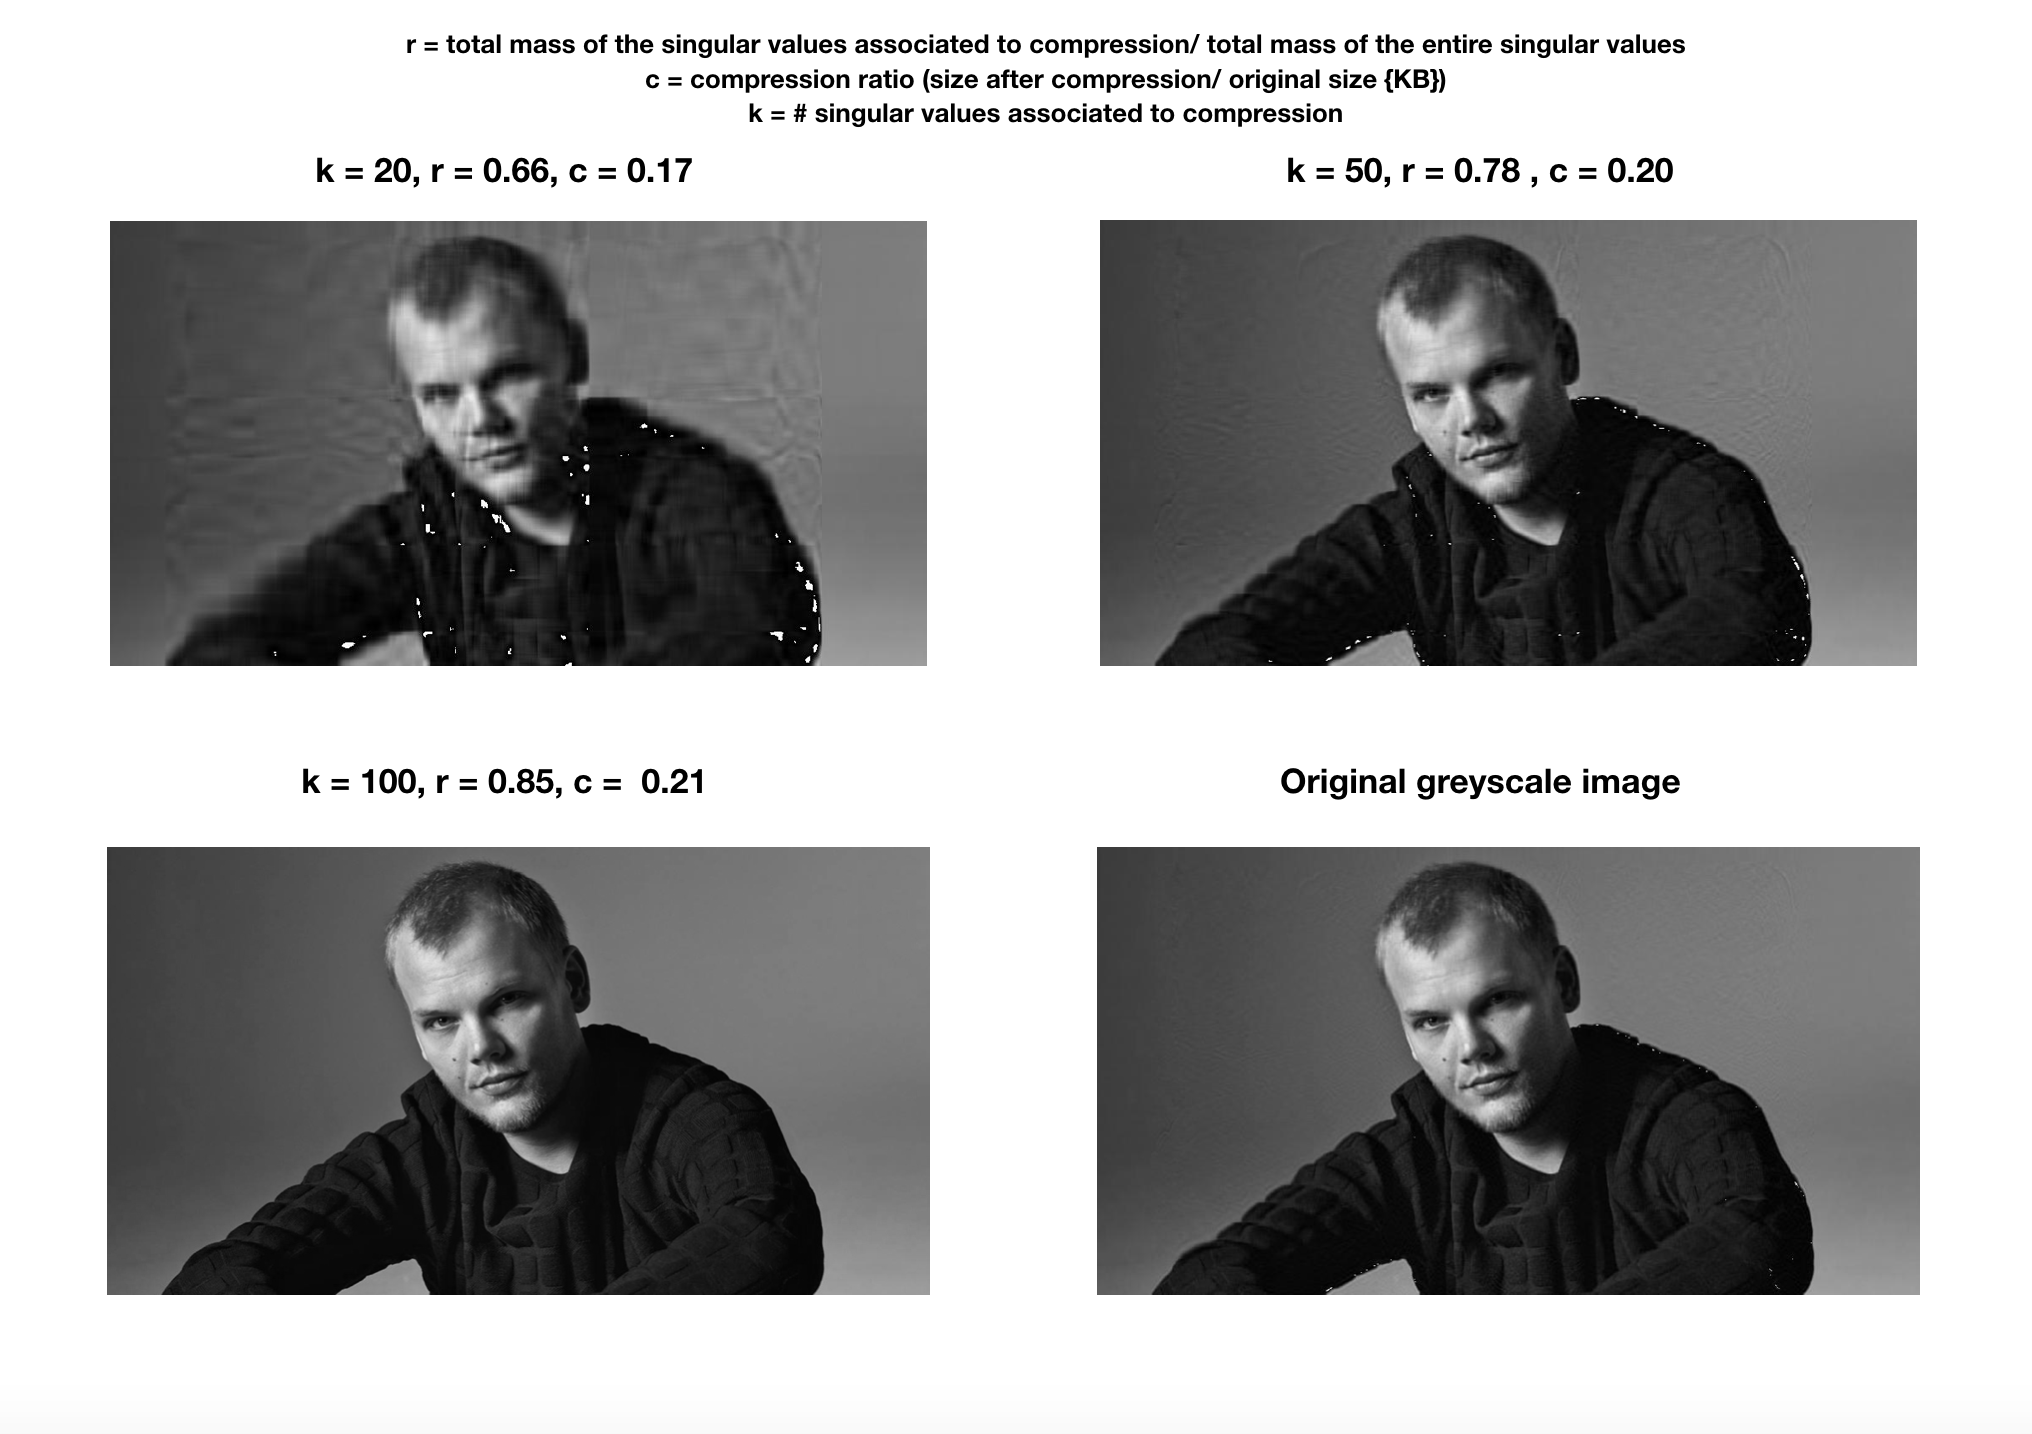

In [19]:
from IPython.display import Image
os.chdir("/Users/groverprince/Documents/msan/labs/msan502_david_algebra/hw5")
Image(filename='Avicii_final.png') 

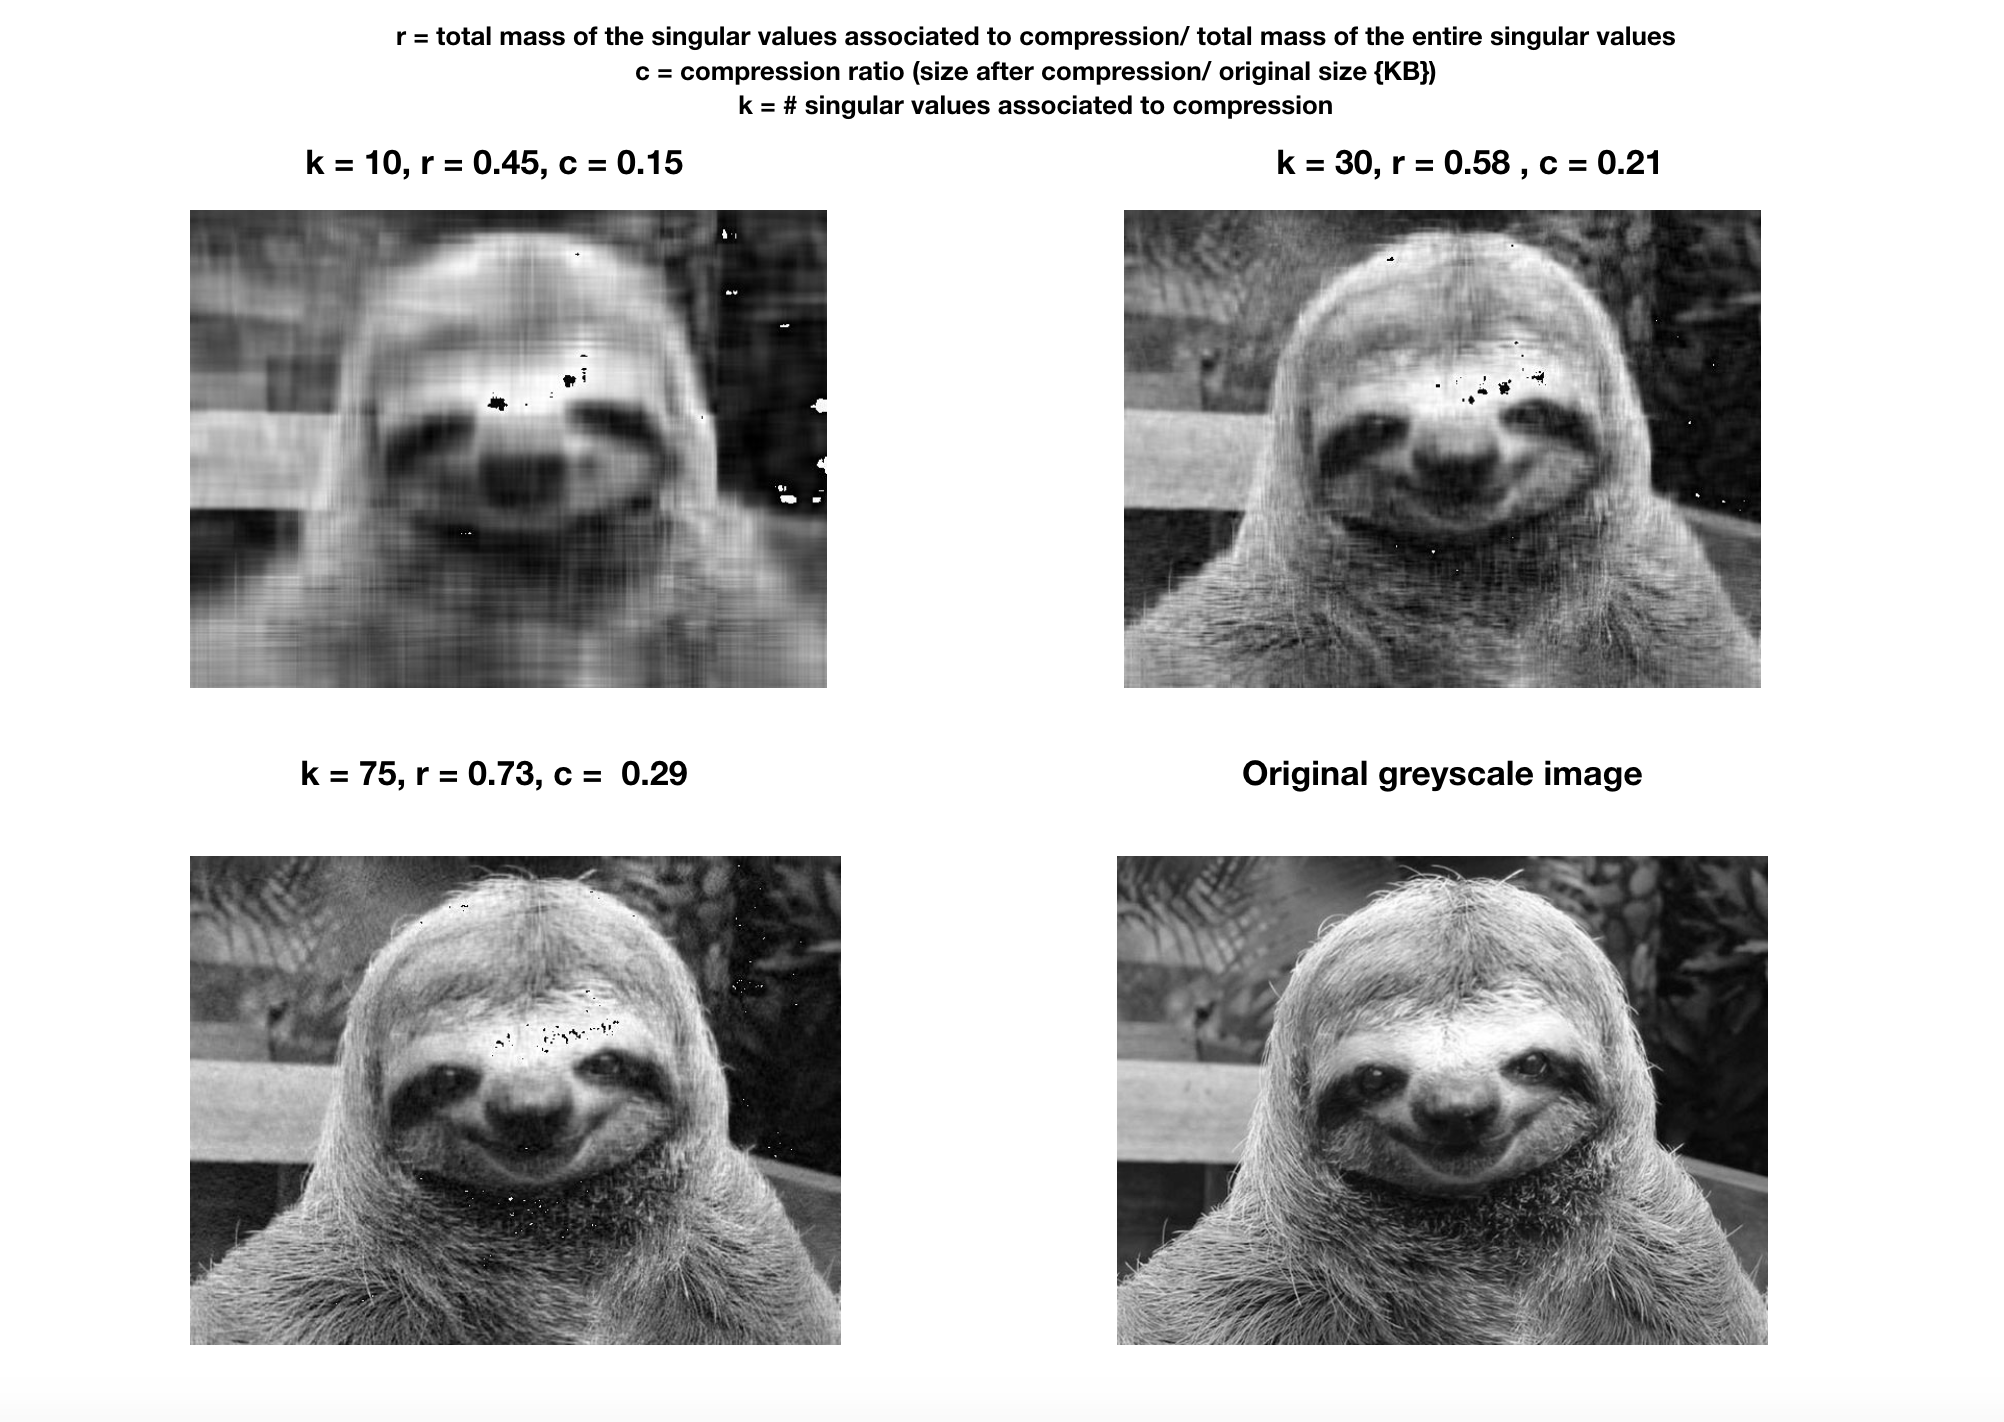

In [20]:
from IPython.display import Image
os.chdir("/Users/groverprince/Documents/msan/labs/msan502_david_algebra/hw5")
Image(filename='Animal_final.png') 

* **Observation 1** - It takes more singular values to make human face closer to original image. Maybe because we tend to seek more features in human face than landscape or in animal face. 
* **Observation 2** - Compression ratios are not very different for both of the above categories. 

Better observation is that even by increasing image clarity, compression ratio was not *increasing much*. This is because we are getting ~80% of information by using only ~75-80 # of singular values. The remaining (rank - k) singular values are very small (as can be seen from singular value plot), therefore even if we more singular values, ratio won't change much.
* **Observation 3** - Total mass of singular values associated to compression is like 75% to 85% for k = 75-100 both both set of images. Now this gives great insights that we are getting ~80% information about image by only using ~80 singular values. 

## Part C

Now, studying the distribution of singular values and estimating power decay using **log-log plots** of singular values

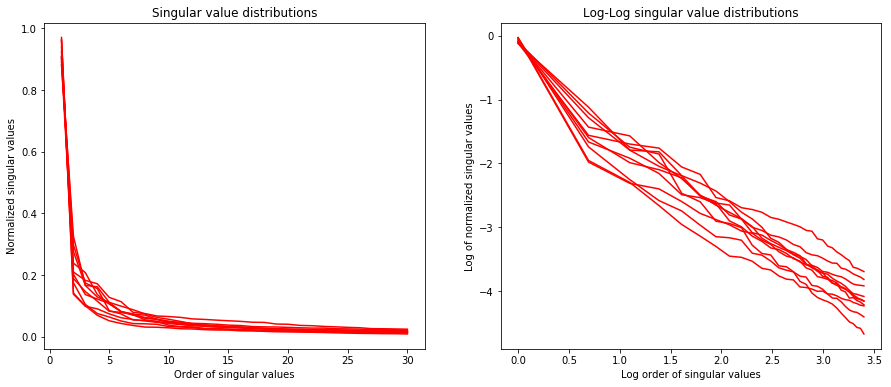

In [103]:
fig = plt.figure(figsize = (15,6))

# Avicii plot singular value
plt1 = fig.add_subplot(121)
for j in range(n_plots):
    plt1.plot(np.arange(m)+1, singular_group1[j][:m], c = "r") 
plt1.set_title("Singular value distributions")
plt1.set_xlabel("Order of singular values")
plt1.set_ylabel("Normalized singular values")
  
# Avicii log-log plot
plt2 = fig.add_subplot(122)
for j in range(n_plots):
    plt2.plot(np.log(np.arange(m)+1), np.log(singular_group1[j][:m]), c = "r") 
plt2.set_title("Log-Log singular value distributions")
plt2.set_xlabel("Log order of singular values")
plt2.set_ylabel("Log of normalized singular values")

plt.show() 

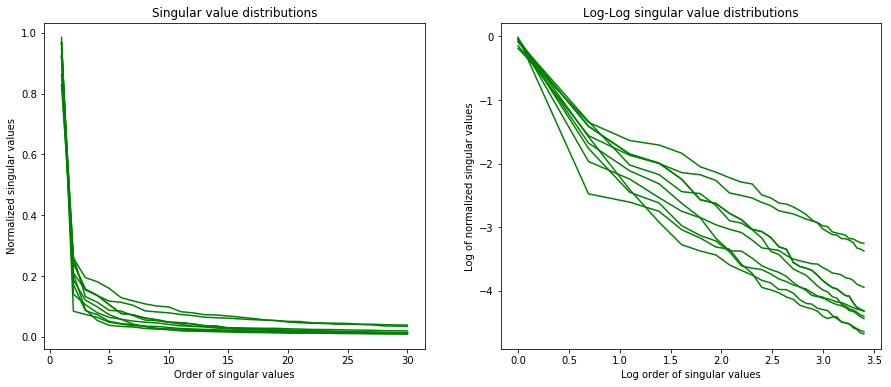

In [100]:
# Funny animals plot singular value
fig = plt.figure(figsize = (15,6))
plt1 = fig.add_subplot(121)

for j in range(n_plots):
    plt1.plot(np.arange(m)+1, singular_group2[j][:m], c = "g") 
plt1.set_title('Singular value distributions')
plt1.set_xlabel("Order of singular values")
plt1.set_ylabel("Normalized singular values")

# Funny animals log-log plot
plt2 = fig.add_subplot(122)
for j in range(n_plots):
    plt.plot(np.log(np.arange(m)+1), np.log(singular_group2[j][:m]), c = "g") 
plt2.set_title('Log-Log singular value distributions')
plt2.set_xlabel("Log order of singular values")
plt2.set_ylabel("Log of normalized singular values")

plt.show() 

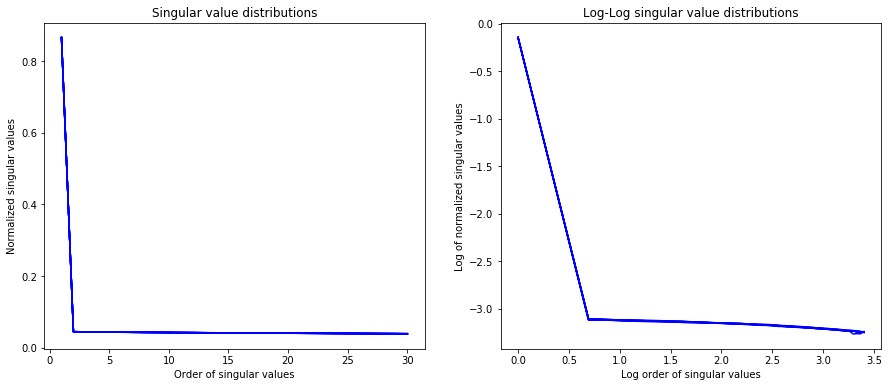

In [104]:
fig = plt.figure(figsize = (15,6))

# Noise matrix plot singular value
plt1 = fig.add_subplot(121)

for j in range(n_plots):
    plt.plot(np.arange(m)+1, singular_group3[j][:m], c = "b") 
plt1.set_title("Singular value distributions")
plt1.set_xlabel("Order of singular values")
plt1.set_ylabel("Normalized singular values")
  
# Noise matrix log-log plot
plt2 = fig.add_subplot(122)

for j in range(n_plots):
    plt.plot(np.log(np.arange(m)+1), np.log(singular_group3[j][:m]), c = "b") 
plt2.set_title("Log-Log singular value distributions")
plt2.set_xlabel("Log order of singular values")
plt2.set_ylabel("Log of normalized singular values")
plt.show() 


* ** Decay Slope for Category 1 ** - 4.5/3.5 ~ ***-1.3***
* ** Decay Slope for Category 2 ** - 4/3.5 ~ ***-1.1***
* ** Decay Slope for Category 3 ** - 3/0.7 ~ ***-4.2***

#### Decay rate is much faster than 3rd category than first 2.

* **Observation 1** - The singular values of first 2 categories are ~ equally distributed. Log-Log plot gives a slope of **~ -1** which is related to decay of singular value distribution. 
* **Observation 2** - But for the 3rd category, the slope of Log-Log plot is steeper than other 2 cases. Therefore, the decay is much faster. Or reframing the last sentence, I could say that most of the information is being captured in only first few (~5) singular values. 
* **Observation 3** - Yes, we could use power law to classify images. Depending on the Log-Log plot of singular values of the new picture, we can probably try to fit it in one of the 3 categories. Although, in my case, it will be very difficult to differentiate b/w 1st and 2nd, but can easily tell about 3rd category. 

### I will now try with my own picture and try to fit in one of the 3 categories. 

In [51]:
from PIL import Image


img = Image.open("mine.jpg").convert('L')
data_image = img.getdata()
m, n = data_image.size

matrix1 = np.array(data_image).reshape(n, m)

matrix1_T = np.matrix.transpose(matrix1)
AA_T = np.matmul(matrix1, matrix1_T)
AT_A = np.matmul(matrix1_T, matrix1)
   
# calculating rank of matrix A 
rank = np.linalg.matrix_rank(matrix1)
   
eig_val_v, eig_vec_v = np.linalg.eig(AT_A)



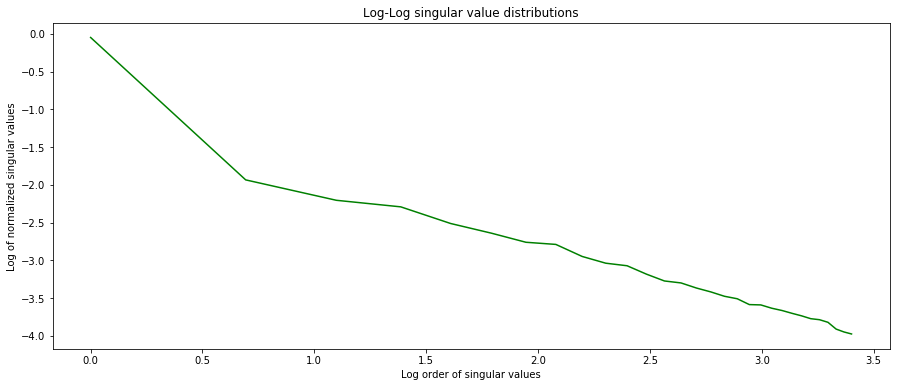

In [105]:
singular_values = np.sqrt(eig_val_v)   
normalised_singular_values = singular_values/np.linalg.norm(singular_values)

import warnings
warnings.filterwarnings('ignore')

#plot of singular values 
# I am taking top 30 singular values for plotting purpose
fig = plt.figure(figsize = (15,6))
x = 30
plt.plot(np.log(np.arange(x)+1), np.log(normalised_singular_values[:x]), color = "green")
plt.title("Log-Log singular value distributions")
plt.xlabel("Log order of singular values")
plt.ylabel("Log of normalized singular values")
plt.legend()
plt.show() 


I have skipped explaing the above code as I have already explained same code in Problem 1. Now, I am getting slope similar to **category 1** (Avicii one) as expected. I have also skipped a few parts of code here (as already shown before) and directly showing the final image obtained if I take **100 singular values**. 

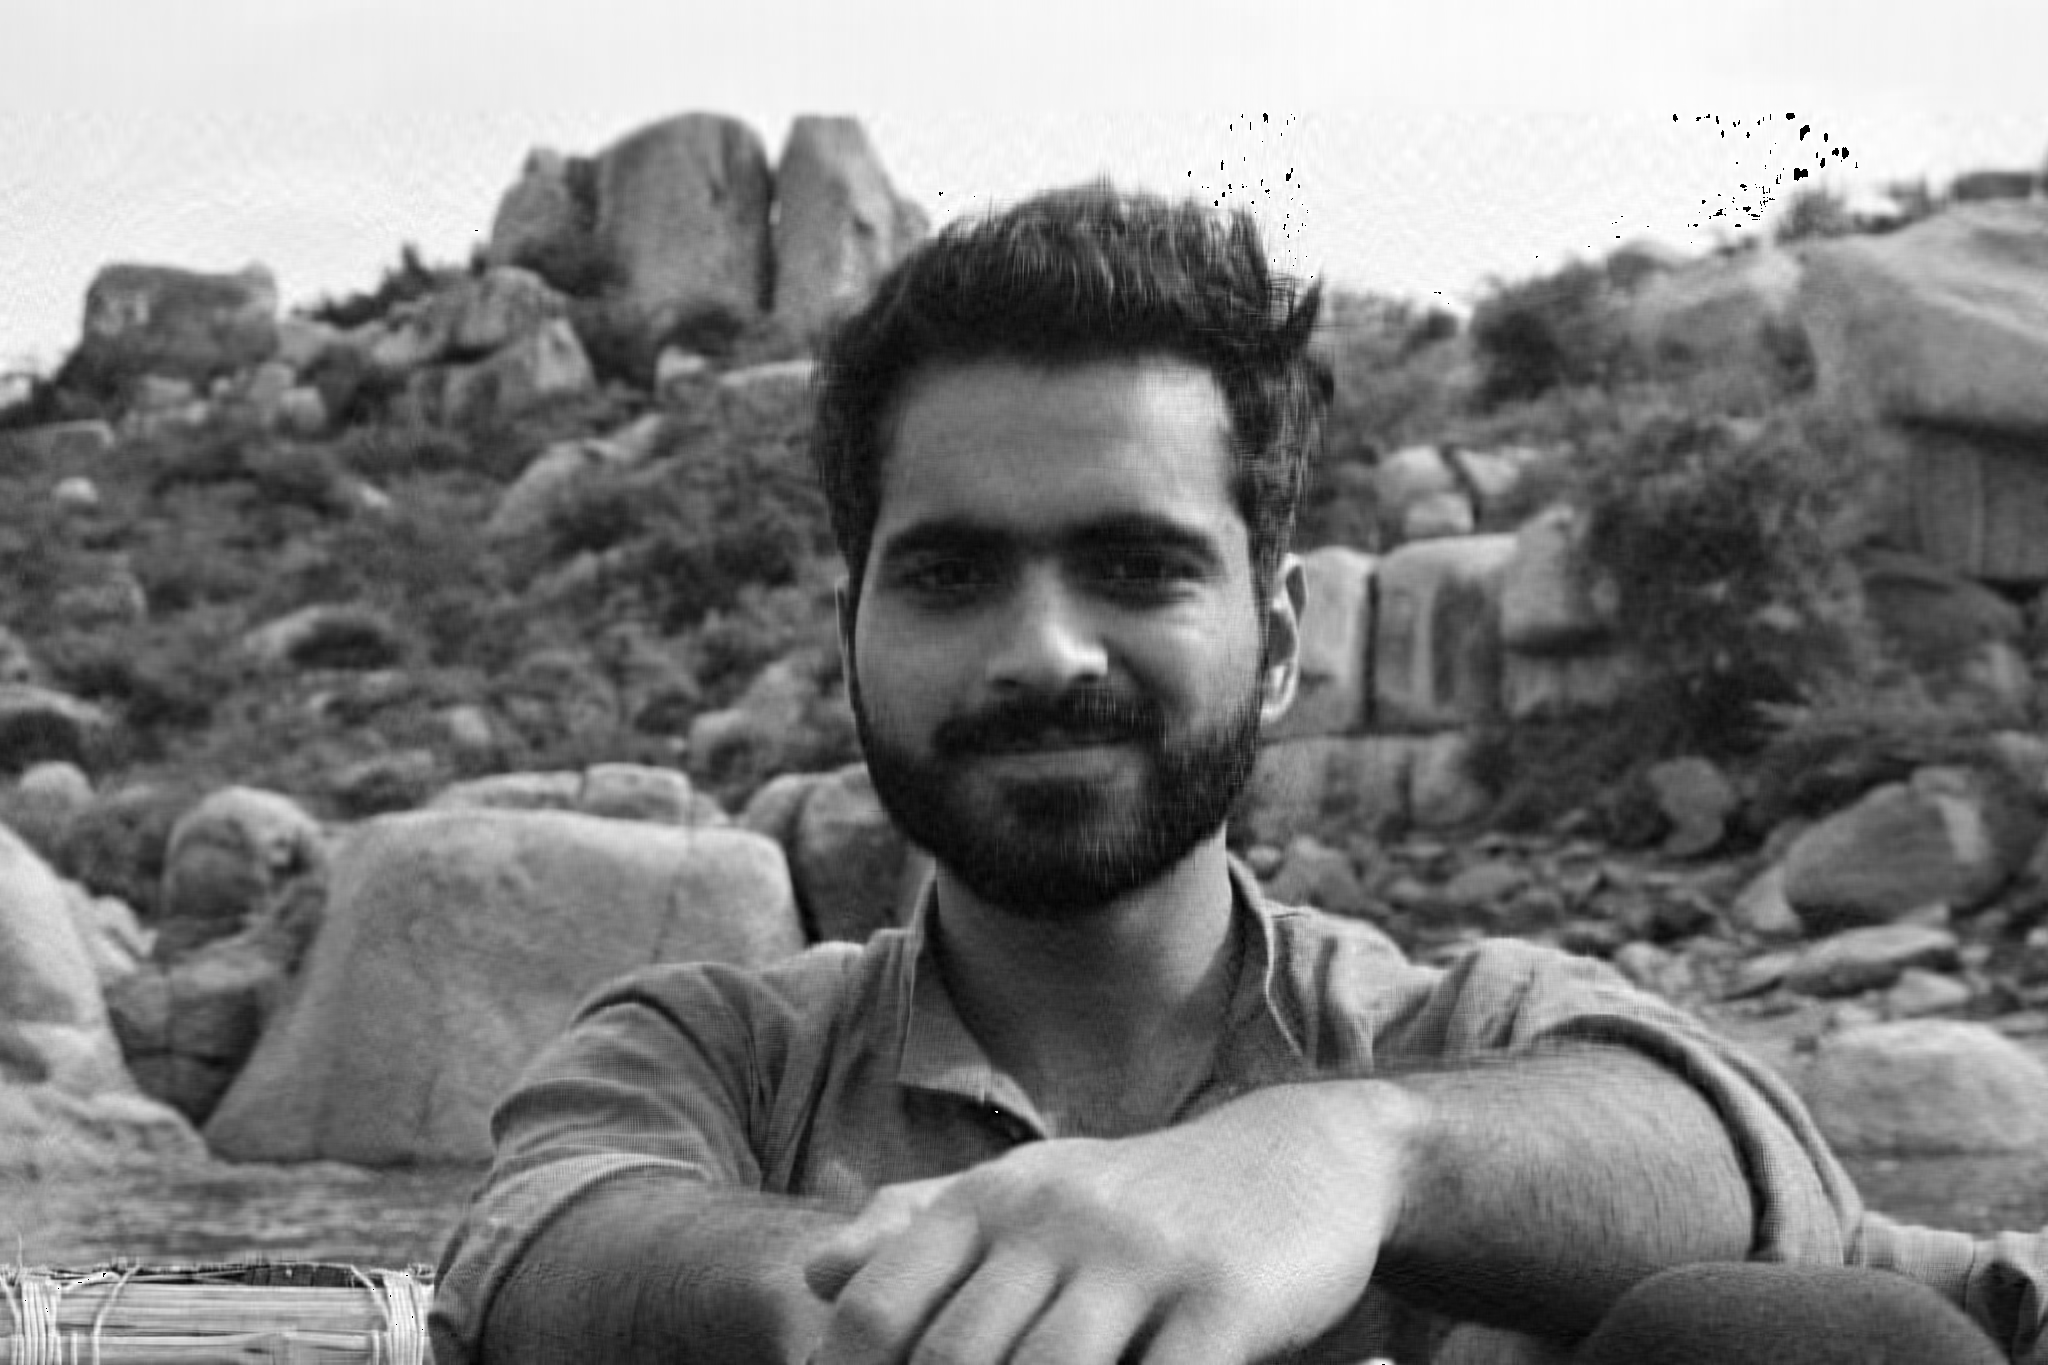

In [58]:
from IPython.display import Image
Image(filename='mine_compressed.png') 